In [2]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import os
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

# Get content from IS-Academia

Determine the url address and visualize its html content using Requests.

In [3]:
# get content from url: replace HTM by filter (it is the URL of "toc)
r = requests.get('http://isa.epfl.ch/imoniteur_ISAP/%21gedpublicreports.filter?ww_i_reportmodel=133685247')

In [4]:
soup = BeautifulSoup(r.content) #get the tree with beatifulsoup
print(soup.prettify()) # present the url content in a nice way

<html>
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
 </head>
 <body>
  <div>
  </div>
  <title>
  </title>
  <script src="GEDPUBLICREPORTS.txt?ww_x_path=Gestac.Base.Palette_js&amp;ww_c_langue=fr" type="text/javascript">
  </script>
  <link href="GEDPUBLICREPORTS.css?ww_x_path=Gestac.Moniteur.Style" rel="stylesheet" type="text/css"/>
  <link href="GEDPUBLICREPORTS.css?ww_x_path=Gestac.Moniteur.StyleNavigator" rel="stylesheet" type="text/css"/>
  <div class="filtres">
   <form action="!GEDPUBLICREPORTS.filter" method="GET" name="f">
    <input name="ww_b_list" type="hidden" value="1"/>
    <input name="ww_i_reportmodel" type="hidden" value="133685247"/>
    <input name="ww_c_langue" type="hidden" value=""/>
    <h1 id="titre">
     Liste des étudiants inscrits par semestre
    </h1>
    <table border="0" id="format">
     <tr>
      <th>
       Format:
      </th>
     </tr>
     <tr>
      <td>
       <input checked="" name="ww_i_reportModelXsl" type="r

C:\Users\Maria\Anaconda3\lib\site-packages\bs4\__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


Find all the options that can be inserted for the table requests. 

In [5]:
soup.find_all('option')

[<option value="null"></option>,
 <option value="942293">Architecture</option>,
 <option value="246696">Chimie et génie chimique</option>,
 <option value="943282">Cours de mathématiques spéciales</option>,
 <option value="637841336">EME (EPFL Middle East)</option>,
 <option value="942623">Génie civil</option>,
 <option value="944263">Génie mécanique</option>,
 <option value="943936">Génie électrique et électronique </option>,
 <option value="2054839157">Humanités digitales</option>,
 <option value="249847">Informatique</option>,
 <option value="120623110">Ingénierie financière</option>,
 <option value="946882">Management de la technologie</option>,
 <option value="944590">Mathématiques</option>,
 <option value="945244">Microtechnique</option>,
 <option value="945571">Physique</option>,
 <option value="944917">Science et génie des matériaux</option>,
 <option value="942953">Sciences et ingénierie de l'environnement</option>,
 <option value="945901">Sciences et technologies du vivant</op

Create a dictionary with the name and the code for each option.

In [6]:
request_dict={}
for op in soup.find_all('option'):
    name = str(op.string)
    value = op.attrs['value']
    request_dict[name]=value
request_dict

{'2007-2008': '978181',
 '2008-2009': '978187',
 '2009-2010': '978195',
 '2010-2011': '39486325',
 '2011-2012': '123455150',
 '2012-2013': '123456101',
 '2013-2014': '213637754',
 '2014-2015': '213637922',
 '2015-2016': '213638028',
 '2016-2017': '355925344',
 'Architecture': '942293',
 'Bachelor semestre 1': '249108',
 'Bachelor semestre 2': '249114',
 'Bachelor semestre 3': '942155',
 'Bachelor semestre 4': '942163',
 'Bachelor semestre 5': '942120',
 'Bachelor semestre 5b': '2226768',
 'Bachelor semestre 6': '942175',
 'Bachelor semestre 6b': '2226785',
 'Chimie et génie chimique': '246696',
 'Cours de mathématiques spéciales': '943282',
 'EME (EPFL Middle East)': '637841336',
 'Génie civil': '942623',
 'Génie mécanique': '944263',
 'Génie électrique et électronique ': '943936',
 'Humanités digitales': '2054839157',
 'Informatique': '249847',
 'Ingénierie financière': '120623110',
 'Management de la technologie': '946882',
 'Master semestre 1': '2230106',
 'Master semestre 2': '9421

### Download the Data

There are stable blocks in the URL and some values we need to choose.
We get the codes from the dictionary for each option we have to choose. 

Warning: there are 2 codes for "semestre de printemps" and "semestre printemps" the good ones are "d'automne" and "de printemps", the others are for erasmus students that we chose not to analyse because they didn't study the whole curiculum at epfl.


In [7]:
#Stable blocks of the URLwe set the GPS to -1 because it is always different and we never have the information on this number, -1 works
unit_ac_block='http://isa.epfl.ch/imoniteur_ISAP/!GEDPUBLICREPORTS.html?ww_x_GPS=-1&ww_i_reportModel=133685247&ww_i_reportModelXsl=133685270&ww_x_UNITE_ACAD='
periode_ac_block='&ww_x_PERIODE_ACAD='
periode_pedago_block='&ww_x_PERIODE_PEDAGO='
hivers_block='&ww_x_HIVERETE='

# variable blocks of the URL to be taken from the dictionnary: 

#choose the section
unit_ac='Informatique'# we only work with informatique section data

#choose bachelor or master
diplome='Master'

#choose the semester: 1 to 6 for Bachelor (5b and 6b seem empty) and 1 to 3 for masters
sem='1'

# compute the pedagogic period

#for the normal semesters:
#periode_pedago= diplome+' semestre '+sem

#for the masters project:
periode_pedago='Projet Master automne'

#compute the type of semester (semester 1 and 3 are always autumn and semesters 2 and 4 are always spring)
if sem=='1' or sem=='3' or sem=='5':
    hivers= 'Semestre d\'automne'
else:
    hivers= 'Semestre de printemps'
print(hivers)

# Loop thought the academic period to get all the data for this pedagogic period 
for i in range(2007,2017):
    #compute the academic period
    periode_ac=str(i)+'-'+str(i+1)
    print(periode_ac)
    
    # write the url
    url=unit_ac_block+request_dict[unit_ac]+periode_ac_block+request_dict[periode_ac]+periode_pedago_block+request_dict[periode_pedago]+hivers_block+request_dict[hivers]

    #check that the url works
    print(url)
    
    #Import the URL and define the header and the column index
    # warning import html returns a list of data frame we only keep the 1st one (the others are empty)
    data=pd.read_html(url,header=1,index_col=10)[0]
    data.head()
    
    #save the data:
    
    #write the title for the file:
    
    #for the normal semesters:
    #title= diplome+'_sem_'+sem+'_'+periode_ac
    
    #for the masters projects:
    title=periode_pedago+periode_ac

    print(title)
    
    #save:
    data.to_pickle(title)

# The tables for the masters project in the spring were empty after 2014 hence we didn't load them


Semestre d'automne
2007-2008
http://isa.epfl.ch/imoniteur_ISAP/!GEDPUBLICREPORTS.html?ww_x_GPS=-1&ww_i_reportModel=133685247&ww_i_reportModelXsl=133685270&ww_x_UNITE_ACAD=249847&ww_x_PERIODE_ACAD=978181&ww_x_PERIODE_PEDAGO=249127&ww_x_HIVERETE=2936286
Projet Master automne2007-2008
2008-2009
http://isa.epfl.ch/imoniteur_ISAP/!GEDPUBLICREPORTS.html?ww_x_GPS=-1&ww_i_reportModel=133685247&ww_i_reportModelXsl=133685270&ww_x_UNITE_ACAD=249847&ww_x_PERIODE_ACAD=978187&ww_x_PERIODE_PEDAGO=249127&ww_x_HIVERETE=2936286
Projet Master automne2008-2009
2009-2010
http://isa.epfl.ch/imoniteur_ISAP/!GEDPUBLICREPORTS.html?ww_x_GPS=-1&ww_i_reportModel=133685247&ww_i_reportModelXsl=133685270&ww_x_UNITE_ACAD=249847&ww_x_PERIODE_ACAD=978195&ww_x_PERIODE_PEDAGO=249127&ww_x_HIVERETE=2936286
Projet Master automne2009-2010
2010-2011
http://isa.epfl.ch/imoniteur_ISAP/!GEDPUBLICREPORTS.html?ww_x_GPS=-1&ww_i_reportModel=133685247&ww_i_reportModelXsl=133685270&ww_x_UNITE_ACAD=249847&ww_x_PERIODE_ACAD=39486325&ww_

# Analyse the Data

## Bachelors

In [8]:
# ANALYSIS OF THE BACHELOR DATA: Build the dataframe
Data_Bachelor=pd.DataFrame([])
#load the data
for i in range(2007,2017):
    #compute the academic period
    periode_ac=str(i)+'-'+str(i+1)
    # define the semester

    for sem in range(1,7):

        Data=pd.read_pickle('Bachelor_sem_'+str(sem)+'_'+periode_ac)

        #add columns with the year and type of semester
        Data['Year']=periode_ac
        Data['Semester']=sem
        #concatenate with the previously loaded data
        Data_Bachelor=pd.concat([Data_Bachelor,Data])
#reshape the data: keep only interesting information
Data_Bachelor=Data_Bachelor.drop(Data_Bachelor.columns[[2,3,4,5,6,7,8,9,10]],axis=1)
Data_Bachelor=Data_Bachelor.reset_index()
Data_Bachelor.head(10)

,No Sciper,Civilité,Nom Prénom,Year,Semester
0,169569,Monsieur,Arévalo Christian,2007-2008,1
1,174905,Monsieur,Aubelle Flavien,2007-2008,1
2,173922,Monsieur,Badoud Morgan,2007-2008,1
3,179406,Monsieur,Baeriswyl Jonathan,2007-2008,1
4,179428,Monsieur,Barroco Michael,2007-2008,1
5,179324,Monsieur,Belfis Nicolas,2007-2008,1
6,174597,Monsieur,Beliaev Stanislav,2007-2008,1
7,179449,Monsieur,Bindschaedler Vincent,2007-2008,1
8,178553,Monsieur,Bloch Marc-Olivier,2007-2008,1
9,179426,Monsieur,Bloch Remi,2007-2008,1


In [9]:
# Group the data by sciper number: one sciper identifies one person.
#when we group we will have the info on all the semesters each person took
Grouped_data=Data_Bachelor.groupby(['No Sciper'])

#The basic statistics give us the number of semester the person did (in count), the 1st semester he did
# (in min) and the last semester he did (in max)
Stats=Grouped_data.describe()


def get_civilite(NoSciper,Data):
    # Function to obtain the sex of a given student 
    Data= Data.rename(columns= {'No Sciper':'NoSciper'}) # Rename column not to have blanks
    civilite = np.array(Data[Data.NoSciper == student].Civilité)[0]
    return civilite
    
# Create empty data frame where we will put all info about students that have completed their bachelors
Data_Bachelor_Clean = pd.DataFrame() 

# Extract information (study duration and sex) of students that have finished their problems
all_students = set(Data_Bachelor['No Sciper'])  # get a list of all the students (unique list, so no student ids are repeated)
for student in all_students:  # iterate across all students
    if type(student) == int or type(student)==str:  # not do analysis if sciper is NaN
        student_info = Stats.loc[student] # get stats info about a given student (counts, mean...)
        # if max registered semester is 6 and min registered semester is 1, obtain infor about student
        # some students appeared to have started at semester 1 and finished at semester 6
        # but only stayed 4 semester. We don't have enough information about them so we removed tehm
        if (float(student_info.loc['max'] == 6)) and (float(student_info.loc['min'] == 1) and float(student_info.loc['count'] >= 6)):
            student_DF = pd.DataFrame({'No Sciper': student, 'Durée':student_info.loc['count'], 'Civilité': get_civilite(student,Data_Bachelor)})
            Data_Bachelor_Clean = Data_Bachelor_Clean.append(student_DF) # append dataframe of student to general data frame 

Data_Bachelor_Clean=Data_Bachelor_Clean.set_index('No Sciper')
Data_Bachelor_Clean.head(10)

,Civilité,Durée
No Sciper,,
245782,Monsieur,6.0
204869,Monsieur,9.0
196683,Monsieur,10.0
229467,Monsieur,6.0
237677,Monsieur,6.0
204958,Monsieur,9.0
204988,Monsieur,10.0
205008,Madame,6.0
213287,Monsieur,11.0


### Analyse the difference between boys and girls

We performed statistics to check if there is a difference in the duration.
We used the ttest because we compare two populations and want to find out if there is a significant difference in their mean value.

                     Durée
Civilité                  
Madame   count   27.000000
         mean     6.851852
         std      1.378508
         min      6.000000
         25%      6.000000
         50%      6.000000
         75%      8.000000
         max     11.000000
Monsieur count  342.000000
         mean     7.116959
         std      1.553845
         min      6.000000
         25%      6.000000
         50%      6.000000
         75%      8.000000
         max     12.000000


Ttest_indResult(statistic=-0.95265795608070958, pvalue=0.34802750292192608)

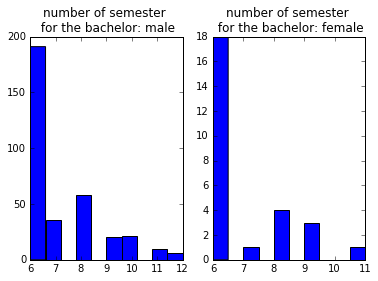

In [24]:
sex=Data_Bachelor_Clean.groupby(['Civilité'])

# basic informations:
print(sex.describe())

# there were only 27 females completing the masters against 342 males

# keep the duration of the study for both groups
male=np.array(sex.get_group('Monsieur')['Durée'])
female=np.array(sex.get_group('Madame')['Durée'])

plt.figure()
plt.subplot(121)
plt.hist(male)
plt.title('number of semester \n for the bachelor: male')
plt.subplot(122)
plt.hist(female)
plt.title('number of semester \n for the bachelor: female')
#most people finished their bachelor in 6 semesters (3 years)

stats.ttest_ind(a= female, b= male, equal_var=False)
# there is no statitically significant difference between male and female in the duration of the bachelor
# the p-value is 0.34 which is not significant (significance if lower than 0.05)

## Masters

For the masters students we decided to keep all the students that did a master project (if they are registered for semester1).
We also kept the students that were not registered in the master project because it seems that the masters project data is incomplete on isacademia
for these students (not registered in masters project) we added one semester because we considered that they must have done the project.
For deciding which one did finish the masters we used the following: if they did a minor, they had to be registered in semester 1 and 3,
if they didn't do a minor, they had to have at least semester 1 and 2 (because they could have done the masters in 1 year + master project).


In [13]:
# ANALYSIS OF THE MASTERS DATA:
Data_Master=pd.DataFrame([])
#load the data
for i in range(2007,2017):
    #compute the academic period
    periode_ac=str(i)+'-'+str(i+1)

    # define the semester: 1 to 3 for the Masters

    for sem in range(1,4):

        Data=pd.read_pickle('Master_sem_'+str(sem)+'_'+periode_ac)

        #add columns with the year and type of semester
        Data['Year']=periode_ac
        Data['Semester']=sem
        #concatenate with the previously loaded data
        Data_Master=pd.concat([Data_Master,Data])
    
    ## add the masters project: consider it as semester 4
    
    # add the autumn masters projects
    Data=pd.read_pickle('Projet Master automne'+periode_ac)

    #add columns with the year and type of semester
    Data['Year']=periode_ac
    Data['Semester']=4
    #concatenate with the previously loaded data
    Data_Master=pd.concat([Data_Master,Data])
    
    #add the spring masters projects: Problem: there was no data for last 3 years: check that the data exists first
    my_file='Projet Master printemps'+periode_ac
    if os.path.isfile(my_file):
        Data=pd.read_pickle(my_file)

        #add columns with the year and type of semester
        Data['Year']=periode_ac
        Data['Semester']=4 #we also put 4 because we don't really care about the semester of the
        #master project for this analysis as long as they did it
        #concatenate with the previously loaded data
        Data_Master=pd.concat([Data_Master,Data])
        
#reshape the data: keep only interesting information       
Data_Master=Data_Master.drop(Data_Master.columns[[2,3,5,7,8,9,10]],axis=1)
Data_Master=Data_Master.reset_index()
Data_Master.head(10)

,No Sciper,Civilité,Nom Prénom,Spécialisation,Mineur,Year,Semester
0,153066,Monsieur,Aeberhard François-Xavier,NaN,NaN,2007-2008,1
1,180027,Madame,Agarwal Megha,NaN,NaN,2007-2008,1
2,152232,Monsieur,Anagnostaras David,NaN,NaN,2007-2008,1
3,177395,Monsieur,Auroux Damien,NaN,NaN,2007-2008,1
4,161970,Monsieur,Awalebo Joseph,NaN,NaN,2007-2008,1
5,166258,Monsieur,Balet Ken,NaN,NaN,2007-2008,1
6,173600,Monsieur,Barazzutti Raphaël Pierre,NaN,NaN,2007-2008,1
7,178879,Monsieur,Bayramoglu Ersoy,NaN,NaN,2007-2008,1
8,154573,Madame,Benabdallah Zeineb,NaN,NaN,2007-2008,1
9,160492,Monsieur,Bettex Marc,NaN,NaN,2007-2008,1


In [15]:
# Group the data by sciper number: one sciper identifies one person.
#when we group we will have the info on all the semesters each person took
Grouped_data=Data_Master.groupby(['No Sciper'])

#The basic statistics give us the number of semester the person did (in count), the 1st semester he did
# (in min) and the last semester he did (in max)
Stats=Grouped_data.describe()

Data_Master_Rename= Data_Master.rename(columns= {'No Sciper':'NoSciper'}) # Rename column not to have blanks
def get_info(NoSciper,Data):
    # Function to obtain the sex of a given student 
    civilite = np.array(Data[Data.NoSciper == student].Civilité)[0]
    specialisation = np.array(Data[Data.NoSciper == student].Spécialisation)[0]
    mineur = np.array(Data[Data.NoSciper == student].Mineur)[0]
    return civilite, specialisation, mineur
    
# Create empty data frame where we will put all info about students that have completed their bachelors
Data_Master_Clean = pd.DataFrame() 

# Extract information (study duration and sex) of students that have finished their problems
all_students = set(Data_Master['No Sciper'])  # get a list of all the students (unique list, so no student ids are repeated)
for student in all_students:  # iterate across all student
    student_info = Stats.loc[student] # get stats info about a given student (counts, mean...)
    # if max registered semester is 6 and min registered semester is 1, obtain infor about student
    add_data = False
    if float(student_info.loc['min'] == 1): # if we have first semester data
        civilite, specialisation, mineur = get_info(student,Data_Master_Rename)
        duree = student_info.loc['count']
        if float(student_info.loc['max'] == 4): # if they did masters project
            add_data = True
        elif type(mineur) == str: # if they have a minor (minor field is not a NaN)
            if float(student_info.loc['max'] == 3): # if they have been registered in 3d semester
                add_data = True
                duree = duree +1 # if not registered in masters project, they did it anyway, so take semester into account
        elif float(student_info.loc['max'] >= 2): # if they don't have a minor, check that they did at least two semesters
            add_data = True
            duree = duree +1 # same as above, take semester of masters project into account
        
        if add_data:
            student_DF = pd.DataFrame({'No Sciper': student, 'Durée':duree, 'Civilité': civilite,'Spécialisation': specialisation,'Mineur': mineur })
            Data_Master_Clean = Data_Master_Clean.append(student_DF) # append dataframe of student to general data frame 

Data_Master_Clean = Data_Master_Clean.set_index('No Sciper')

In [16]:
#group the data by specialisation
specialisation=Data_Master_Clean.groupby('Spécialisation')
specialisation.describe()

Durée
Spécialisation                                 
Biocomputing                   count   1.000000
                               mean    4.000000
                               std          NaN
                               min     4.000000
                               25%     4.000000
                               50%     4.000000
                               75%     4.000000
                               max     4.000000
Computer Engineering - SP      count   4.000000
                               mean    4.500000
                               std     0.577350
                               min     4.000000
                               25%     4.000000
                               50%     4.500000
                               75%     5.000000
                               max     5.000000
Data Analytics                 count   2.000000
                               mean    3.500000
                               std     0.707107
                               min     3.000000
                               25%     3.250000
                               50%     3.500000
                               75%     3.750000
                               max     4.000000
Foundations of Software        count  15.000000
                               mean    4.666667
                               std     0.975900
                               min     3.000000
                               25%     4.000000
                               50%     4.000000
...                                         ...
Internet computing             std     0.787752
                               min     3.000000
                               25%     4.000000
                               50%     5.000000
                               75%     5.000000
                               max     7.000000
Service science                count   2.000000
                               mean    4.000000
                               std     0.000000
                               min     4.000000
                               25%     4.000000
                               50%     4.000000
                               75%     4.000000
                               max     4.000000
Signals, Images and Interfaces count  14.000000
                               mean    5.071429
                               std     0.997249
                               min     4.000000
                               25%     4.000000
                               50%     5.000000
                               75%     6.000000
                               max     7.000000
Software Systems               count   5.000000
                               mean    4.800000
                               std     0.447214
                               min     4.000000
                               25%     5.000000
                               50%     5.000000
                               75%     5.000000
                               max     5.000000

[72 rows x 1 columns]

In [17]:
# compute the list of possible specialisations
list_spe=Data_Master_Clean['Spécialisation'].value_counts().index.tolist()
list_spe

['Internet computing',
 'Foundations of Software',
 'Signals, Images and Interfaces',
 'Software Systems',
 'Computer Engineering - SP',
 'Data Analytics',
 'Service science',
 'Information Security - SP',
 'Biocomputing']

In [19]:
#get the duration of the studies for each group: put it in a dictionnary under the name of each group

spe_dict={}
for spe in list_spe:
    spe_dict[spe]=np.array(specialisation.get_group(spe)['Durée'])

In [20]:
# create a datafram to put the stats results
results=pd.DataFrame()
results['Spécialisation']=list_spe

### Statistical analysis of the difference between the specialisations

We use one sample ttest to compare the data for each specialisation with the mean across all the students.

In [21]:
#get the duration of the studies for everyone
all_durations=np.array(Data_Master_Clean['Durée'])

#create vectors with the p-values  for all one sample ttest, means of the duration, significance
#also write + for bigger than general mean and - for lower than general mean
tt_test=[]
moy=[]
sign=[]
sup=[]
taille=[]

for spe in list_spe:
    ttest=stats.ttest_1samp(a=spe_dict[spe], popmean= all_durations.mean())
    tt_test.append(ttest[1])
    moyenne=np.mean(spe_dict[spe])
    moy.append(moyenne) 
    taille.append(len(spe_dict[spe]))
    if ttest[1]<=0.05:
        sign.append('significant')
    else:
        sign.append('not significant')
    
    if all_durations.mean()<= moyenne:
        sup.append('+')
    else:
        sup.append('-')

C:\Users\Maria\Anaconda3\lib\site-packages\numpy\core\_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


In [22]:
#add the results in the dataframe
results['Number of students']=taille
results['Mean duration']=moy
results['Difference from general mean']=sup
results['p-value']=tt_test
results['significance']=sign
results.set_index('Spécialisation')

#ANALYSIS OF RESULTS:
#we found a significant difference between the mean duration of the masters for the students 
#registered in Signals, Images and Interfaces and in Service science
# However the students in service science are only two so we cannot conclude on these results

# the students in Signals, Images and Interfaces took longer than the average (5.07 against 4.25 semesters)

,Number of students,Mean duration,Difference from general mean,p-value,significance
Spécialisation,,,,,
Internet computing,23,4.565217,+,0.064164,not significant
Foundations of Software,15,4.666667,+,0.116496,not significant
"Signals, Images and Interfaces",14,5.071429,+,0.008440,significant
Software Systems,5,4.800000,+,0.050096,not significant
Computer Engineering - SP,4,4.500000,+,0.442238,not significant
Data Analytics,2,3.500000,-,0.376268,not significant
Service science,2,4.000000,-,0.000000,significant
Information Security - SP,1,5.000000,+,NaN,not significant
Biocomputing,1,4.000000,-,NaN,not significant


### BONUS QUESTION: difference between male and female

                     Durée
Civilité                  
Madame   count  101.000000
         mean     4.277228
         std      0.991149
         min      3.000000
         25%      4.000000
         50%      4.000000
         75%      5.000000
         max      8.000000
Monsieur count  662.000000
         mean     4.240181
         std      0.953385
         min      3.000000
         25%      4.000000
         50%      4.000000
         75%      5.000000
         max      8.000000


Ttest_indResult(statistic=0.3516369387055473, pvalue=0.72568059411174635)

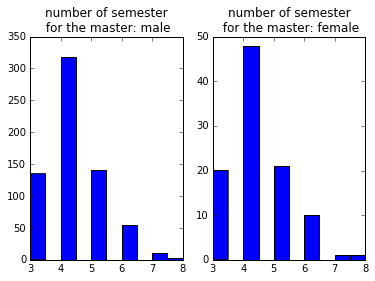

In [23]:
# analyse the difference between boys and girls
sex=Data_Master_Clean.groupby(['Civilité'])

# basic informations:
print(sex.describe())

# there were only 27 females completing the masters against 342 males

# keep the duration of the study for both groups
male=np.array(sex.get_group('Monsieur')['Durée'])
female=np.array(sex.get_group('Madame')['Durée'])

plt.figure()
plt.subplot(121)
plt.hist(male)
plt.title('number of semester\n for the master: male')
plt.subplot(122)
plt.hist(female)
plt.title('number of semester\n for the master: female')
#most people took 2 years to finish the masters

# perform the statistics to check if there is a difference in the duration
# we use the ttest because we compare two populations and want to find out if there
# is a significant difference in their mean value

stats.ttest_ind(a= female, b= male, equal_var=False)
# there is no statistically significant difference on the duration of the master for all the years together